## Problem 0: RRT Planner Implementation
Implement the following and ensure the unit tests pass (be sure to read the headers for each function).
* `chap12/planner_utilities.py`:
  * `plan_path(...)`
  * `find_closest_configuration(...)`
  * `generate_random_configuration(...)`
  * `find_shortest_path(...)`
  * `smooth_path(...)`
* `chap12/rrt_straight_line.py`:
  * `create_rrt_plan(...)`  

### Hints on implementation
* `np.random.rand()` can be used to calculate a random number between 0 and 1
* Take a good look at `MsgWaypoints`
  * See the documentation for `Waypoint` in `msg_waypoints.py`
  * `tree.connect_to_goal.item(i)` make sure to set and use the `connect_to_goal` property of `MsgWaypoints`. This is used to indicate that this waypoint could be connected to the goal, not that it is the goal waypoint.
    * Note that you do not ever need to add the goal waypoint to the tree structure, you just set 
  * Waypoints can be added by either adding a `Waypoint` through `add_waypoint(...)` or through specifying the values of the waypoint through `add(...)`. Waypoint data can be accessed individually or by calling the `get_waypoint(...)` function to extract all of the data for the waypoint
  * `tree.parent.item(i)` will return the parent of the waypoint at index `i`. Make sure to set the parent value appropriately.
  * MsgWaypoints::parent should be an array of integers, but unfortunately it can contain floats. Make sure to cast the output of tree.parent.item(i) to an integer before using it as an index.


### Note on the unit tests
There will only be unit tests for `plan_path(...)`, `find_closest_configuration(...)`, `find_shortest_path(...)`, and `smooth_path(...)`.

There will **be no** unit tests for `generate_random_configuration(...)` and `create_rrt_plan(...)`

In [1]:
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap12.run_sim import run_sim
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.message_types.msg_world_map import MsgWorldMap
from mav_sim.tools.types import NP_MAT

from mav_sim.chap12.world_viewer import WorldViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view

# The viewers need to be initialized once due to restart issues with qtgraph
if 'world_view' not in globals():
    print("Initializing waypoint viewer")
    global world_view
    world_view = WorldViewer()
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()

# Initialize the simulation parameters
sim_params_default = MsgSimParams(end_time=200.) # Sim ending in 10 seconds
state = DynamicState()

# Function for running simulation and displaying results
def run_sim_and_display(end_pose: NP_MAT, sim_params: MsgSimParams = sim_params_default):
    global world_view
    global data_view
    data_view.reset(sim_params.start_time)
    (world_view, data_view) = run_sim(sim=sim_params, end_pose=end_pose, init_state=state, world_view=world_view, data_view=data_view)
    display_data_view(data_view)
    display_mav_view(world_view)


136.62760706610337
Initializing waypoint viewer
Initializing data_view


WindSimulation::__init__() Need to implement
mav_dynamics::update_velocity_data() Needs to be implemented
planning...
...done planning.
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
mav_dynamics::update_velocity_data() Needs to be implemented
drawmav.py::get_points() Need to add the tail colors
Need to implement
drawmav.py::points_to_mesh() Need to create the horizontal an

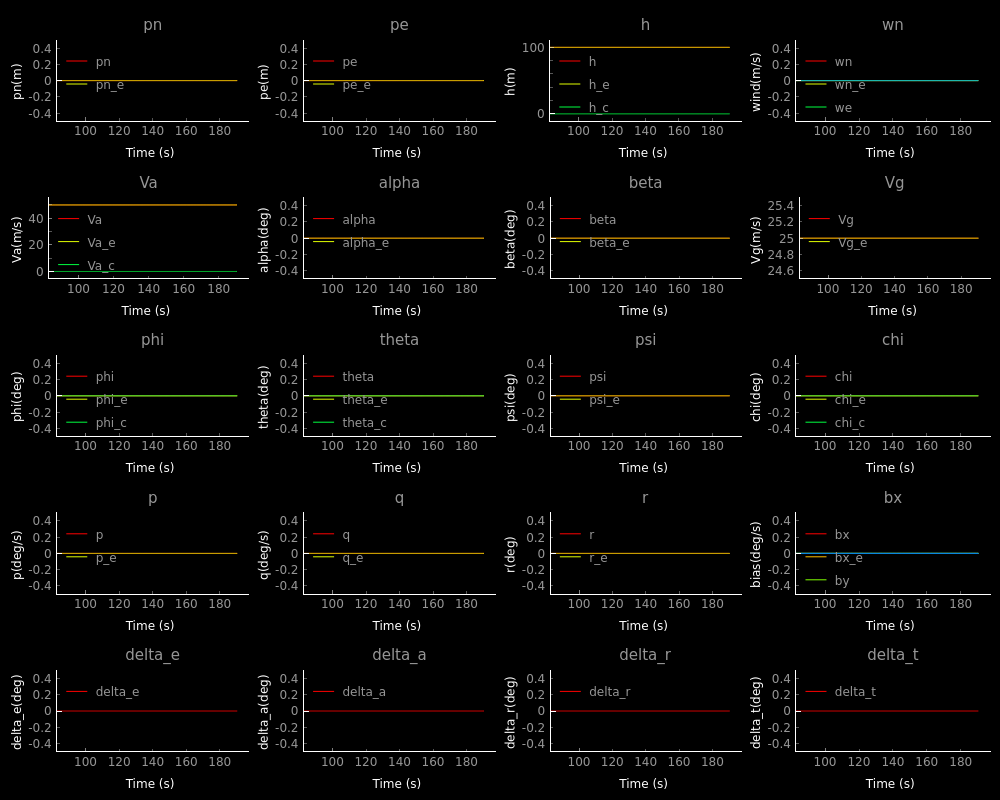

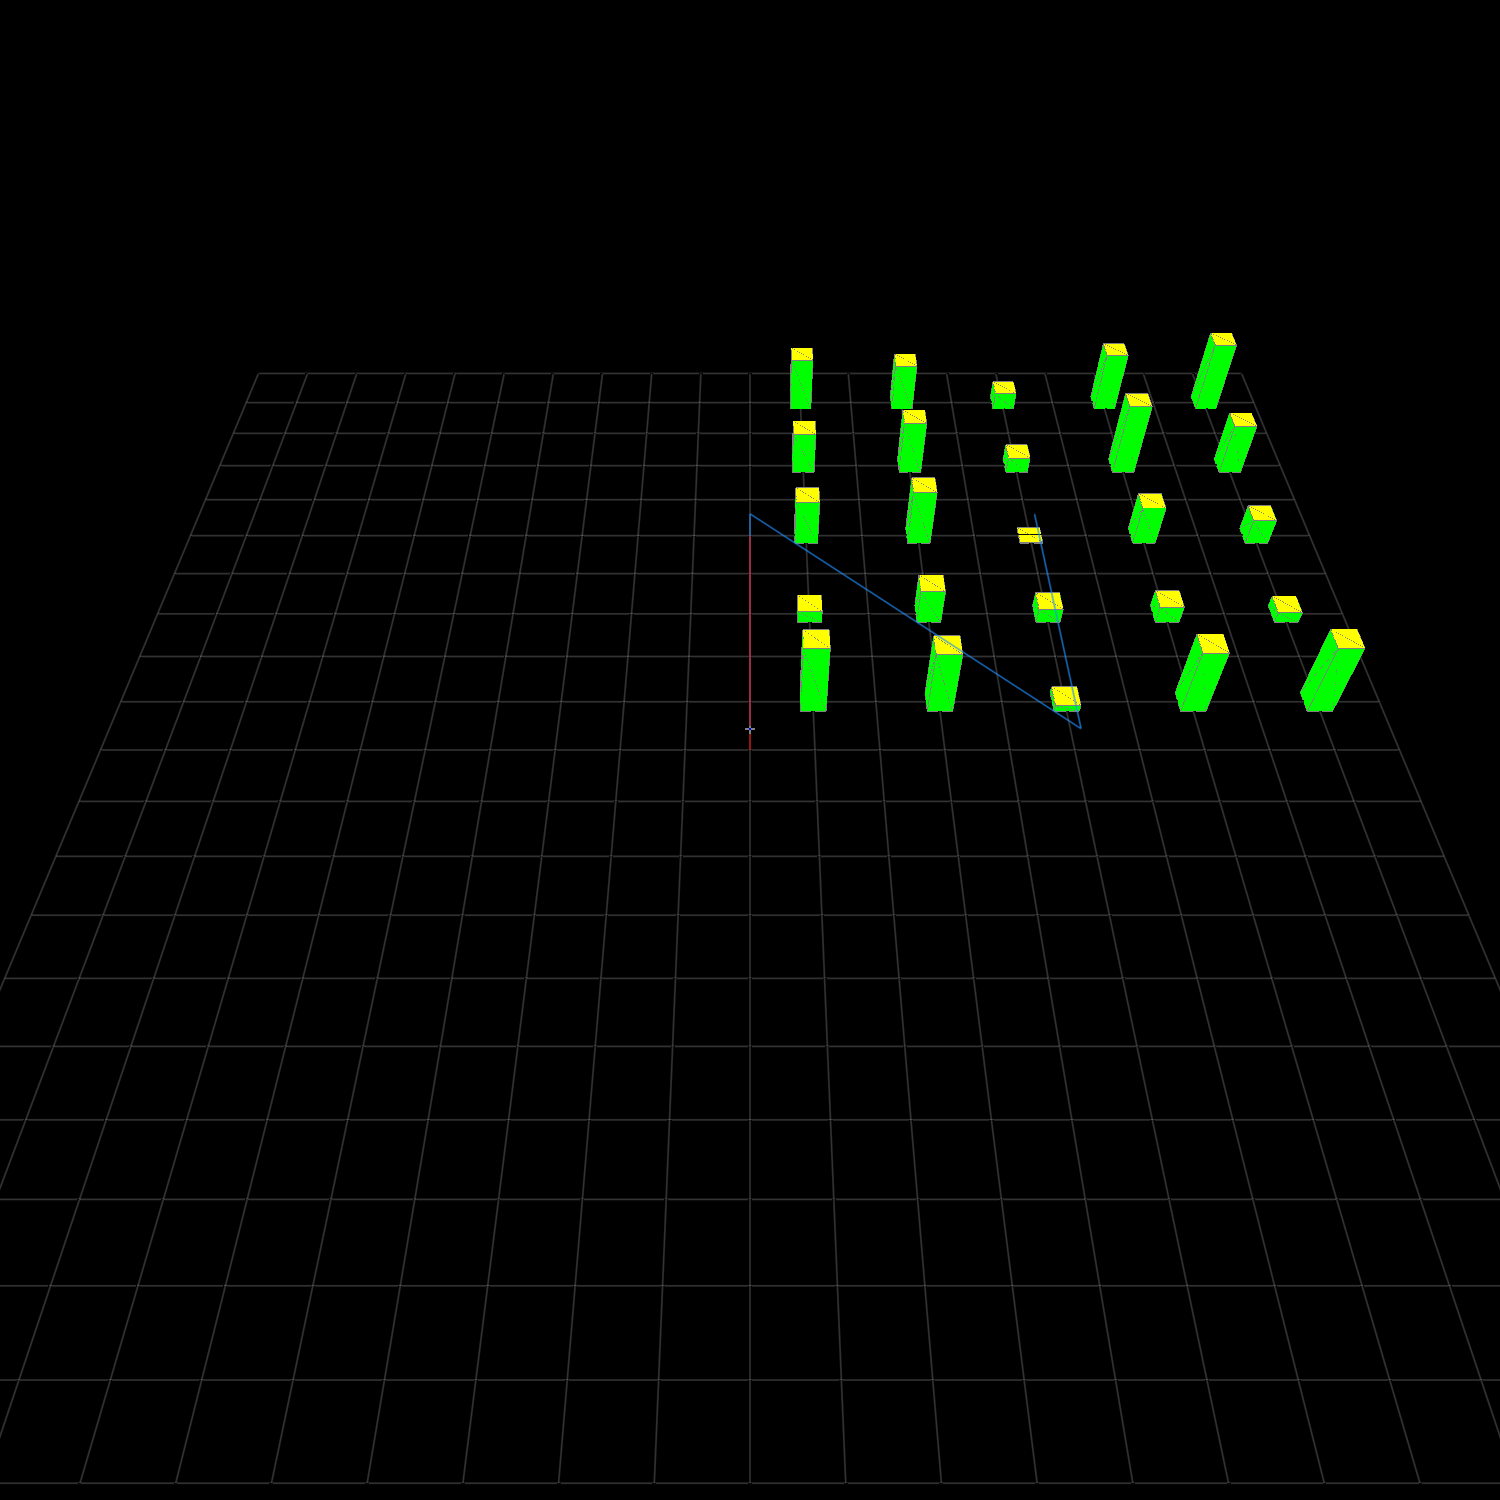

In [2]:
# Final point definition
world_map = MsgWorldMap()
end_pose = np.array([[world_map.city_width], [world_map.city_width],
                                    [-100]])

# Run the simulation
run_sim_and_display(end_pose=end_pose)

## Problem 1: Top Left Corner
Rerun the simulation with the following changes:
* Have the end pose be the top left corner (instead of top-right as defined above).
* Adjust the sim time so that the UAV makes it only part of the way to the end pose, but does have sufficient time to be on the path.

In [ ]:
# Code goes here

## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ mav_sim/chap11/ mav_sim/chap12/ book_assignments
```

Terminal output (should indicate no error):
```
(put results here)
```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ mav_sim/chap11/ mav_sim/chap12/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
(put results here)
```

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!` If it does, then write an explanation of why those failed tests are okay. For example, you may describe that the function is testing a fringe case where the value changes at $\pi/2$. Your function behaves well up to the boundary, but perhaps struggles with some points that are numerically on / close to the boundary.

### Reasoning for results not being perfect on the unit tests
(For each unit test that failed, write a brief explanation of why it is okay that it failed)

In [ ]:
from mav_sim.unit_tests.ch12_straight_line_rrt_test import run_tests
run_tests()
# If you want to run a specific test
# run_tests(<the_test_number>)